**1.ordinary**

In [2]:
df <- data.frame(Time=c("P14","P21","P28","P56"), Frequency=c(5,12,8,9))
head(df)

,Time,Frequency
,<chr>,<dbl>
1,P14,5
2,P21,12
3,P28,8
4,P56,9


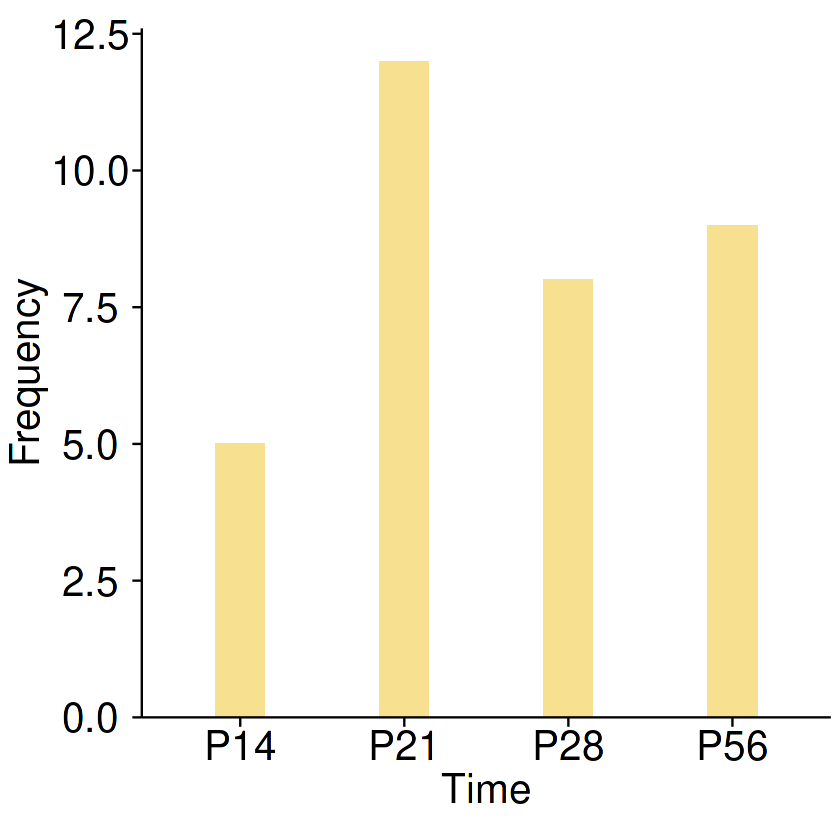

In [5]:
library(ggplot2)
ggplot(df, aes(x = Time, y = Frequency)) + geom_col(width=0.3, fill = "#f7e090") +
  labs(x = "Time", y = "Frequency") +
  scale_y_continuous(expand = expansion(mult = c(0, 0.05))) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5, size = 24, color = "black"),
        axis.text.y = element_text(angle = 0, hjust = 0.5, size = 24, color = "black"),
        axis.ticks.length = unit(0.2,'cm'),
        axis.ticks = element_line(color = "black",linewidth = 0.5),
        axis.line = element_line(color = "black",linewidth = 0.5),
        panel.grid=element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 24),
        legend.title = element_blank(),
        legend.position = "none",
        legend.margin = margin(0, 0, 0, 0),
        legend.text = element_text(size = 18, color = "black"),
        aspect.ratio = 1/1,
        plot.title = element_blank())

**2.Stacked**

In [8]:
Supported <- c("Flower0", "Flower1", "Flowers2", "Flowers3", "FlowersMore")
Firefly <- c(10011, 15326, 15337, 19482, 30355)
Kafka <- c(12497, 7652, 8064, 11359, 30355)
Bronya <- c(27632, 30269, 19324, 20806, 30355)
SilverWolf <- c(46209, 28746, 17366, 19438, 30355)
BlackSwan <- c(57834, 14787, 8744, 14839, 30355)

df <- data.frame(Firefly=Firefly, Kafka=Kafka, Bronya=Bronya, SilverWolf=SilverWolf, BlackSwan=BlackSwan, Supported=Supported)
df <- reshape2::melt(df, id.vars="Supported")
colnames(df) <- c("Supported", "Character", "Number")
head(df)

,Supported,Character,Number
,<chr>,<fct>,<dbl>
1,Flower0,Firefly,10011
2,Flower1,Firefly,15326
3,Flowers2,Firefly,15337
4,Flowers3,Firefly,19482
5,FlowersMore,Firefly,30355
6,Flower0,Kafka,12497


In [9]:
library(ggplot2)
# 4个类别
df$Supported[df$Supported=="Flowers2"] <- "Flowers2-3"
df$Supported[df$Supported=="Flowers3"] <- "Flowers2-3"
df$Supported <- factor(df$Supported, levels = c("Flower0", "Flower1", "Flowers2-3", "FlowersMore")) 
# x轴顺序
df$Character <- factor(df$Character, levels = c("Firefly", "Kafka", "SilverWolf", "Bronya", "BlackSwan"))

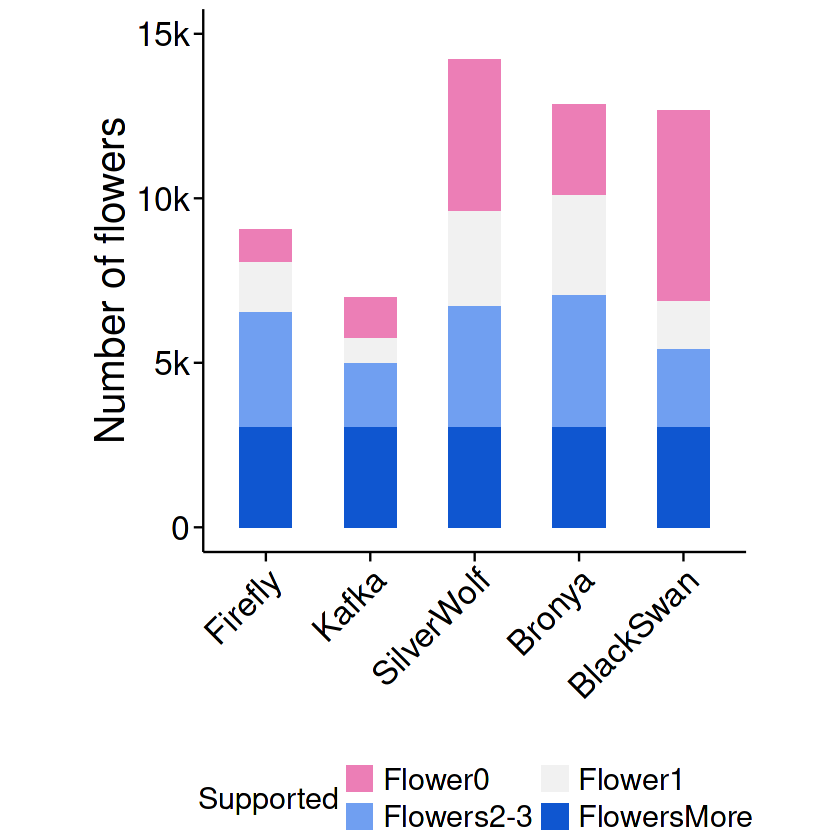

In [25]:
ggplot(df, aes(x=Character, y=Number, fill=Supported)) +
  labs(x = "", y = "Number of flowers", title = "") + 
  geom_bar(position="stack", stat="identity", width = 0.5) + 
  scale_fill_manual(values = c("#ec7eb6", "#f1f1f1", "#709ff1", "#0f56d0")) +
  scale_y_continuous(breaks = c(0, 50000, 100000, 150000),limit=c(0,150000),labels = c("0", "5k", "10k", "15k")) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 20, color = "black"),
        axis.text.y = element_text(angle = 0, hjust = 1, size = 20, color = "black"),
        plot.title = element_blank(),
        axis.line = element_line(color = "black",linewidth = 0.5),
        axis.ticks.length = unit(0.2,'cm'),
        axis.ticks = element_line(color = "black",linewidth = 0.5),
        panel.grid=element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 24),
        legend.text = element_text(size = 18, color = "black"),
        legend.title = element_text(size = 18),
        legend.position = "bottom",
        legend.margin = margin(0, 0, 0, 0),
        aspect.ratio = 1/1,) +
  guides(fill = guide_legend(nrow = 2, byrow = TRUE),
         shape = guide_legend(nrow = 2, byrow = TRUE),
         color = guide_legend(nrow = 2, byrow = TRUE)) 

**3.Layered**

In [27]:
df <- data.frame(Character=c("Bronya", "Jingyuan", "Gepard"),
                 Attack=c(582, 698, 543),
                 Defend=c(533, 485, 654),
                 HealthPoint=c(1241, 1164, 1397))
df <- reshape2::melt(df,id.vars="Character")
head(df)

,Character,variable,value
,<chr>,<fct>,<dbl>
1,Bronya,Attack,582
2,Jingyuan,Attack,698
3,Gepard,Attack,543
4,Bronya,Defend,533
5,Jingyuan,Defend,485
6,Gepard,Defend,654


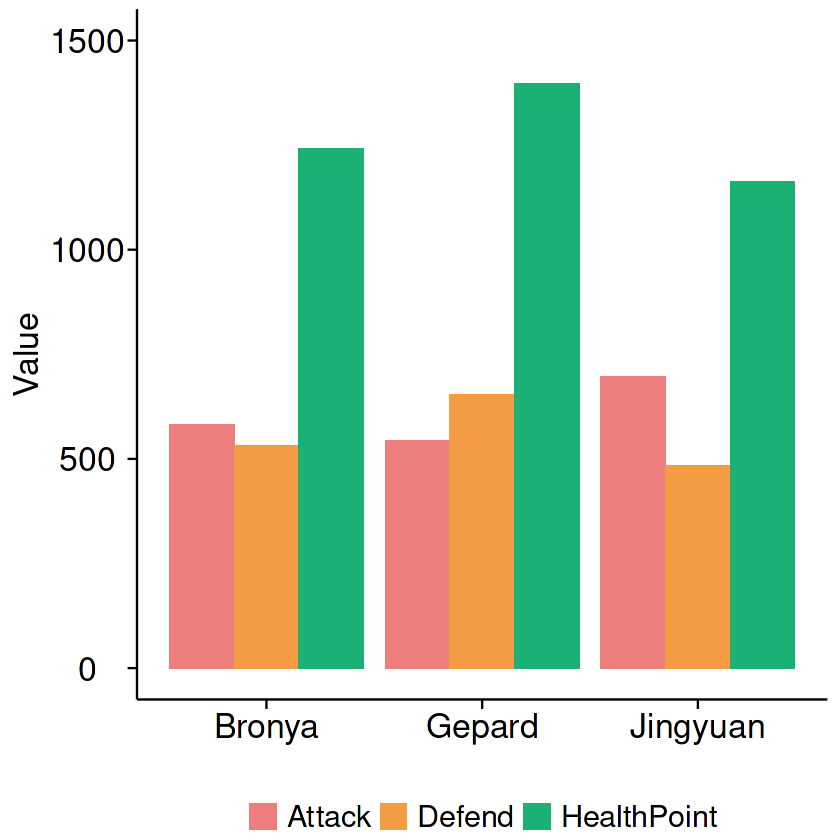

In [31]:
ggplot(df, aes(x=Character, y=value, fill=variable)) + 
  geom_bar(position="dodge",stat="identity") + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5, size = 20, color = "black"),
        axis.text.y = element_text(angle = 0, hjust = 0.5, size = 20, color = "black"),
        plot.title = element_blank(),
        axis.line = element_line(color = "black",linewidth = 0.5),
        axis.ticks.length = unit(0.2,'cm'),
        axis.ticks = element_line(color = "black",linewidth = 0.5),
        panel.border = element_blank(),
        panel.grid = element_blank(),
        legend.title = element_blank(),
        legend.text = element_text(size = 18, color = "black"),
        legend.position = "bottom",
        legend.margin = margin(0, 0, 0, 0),
        text = element_text(size = 20),
        aspect.ratio = 1/1) +
  scale_y_continuous(breaks = c(0, 500, 1000, 1500), labels = c("0", "500", "1000", "1500"), limits = c(0, 1500)) +
  scale_fill_manual(values=c("#ee7d7d", "#f39c43", "#1bb174")) +
  labs(x="", y="Value")